In [1]:
import torch, os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

pd.set_option("display.max_columns", None)
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path_csv = "../data/data_horizons.csv"
path_csv_annotator_ids = '../data/Kartierer_ID.csv'
path_csv_locations = '../data/STANDORT.csv'
path_pictures = "/Users/felix/Library/CloudStorage/Dropbox/data/BGR-Data-Bodenhorizonte/Profilbilder/"
path_images = "images"
path_masks = "masks"

df = pd.read_csv(path_csv, sep=';').dropna(subset=['Bodenart'])
image_dataset = os.listdir(path_pictures)
img_files = pd.DataFrame(image_dataset, columns=['file'])
img_files['Point'] = img_files['file'].str.split("_")\
                            .map(lambda x: x[1]).astype(float)

df = pd.merge(df, img_files, how='inner', on='Point')
df['file'] = df['file'].map(lambda x: os.path.join(path_pictures, x))

df_k = pd.read_csv(path_csv_annotator_ids, sep=';')
df_k = df_k.rename({'PointID':'Point'},axis=1)
df_loc = pd.read_csv(path_csv_locations, sep=';')
df_loc = df_loc.rename({'PointID':'Point'},axis=1)

df = pd.merge(df, df_k, how='inner', on='Point')
df = pd.merge(df, df_loc, how='inner', on='Point')

keep_columns = ['Point', 
                'HorizontID', 
                'Obergrenze', 
                'Untergrenze', 
                'Horizontsymbol',
                'Bodenart', 
                'Bodenfarbe', 
                'Steine', 
                'Karbonat', 
                'Humusgehaltsklasse',
                'Durchwurzelung', 
                'max_depth', 
                'file', 
                'Aufnehmer', 
                'Probenahme_Monat',
                'Probenahme_Jahr', 
                'xcoord', 
                'ycoord', 
                'Bodenklimaraum_Name',
                'Landnutzung', 
                'BZE_Moor', 
                'Hauptbodentyp', 
                'BodenVarTypSub',
                'GrundwaStufe', 
                'GrundwaStand', 
                'Moormaechtigkeit', 
                'Torfmaechtigkeit',
                'Neigung', 
                'Exposition', 
                'Woelbung', 
                'Reliefformtyp', 
                'LageImRelief',
                'KV_0_30', 
                'KV_30_100']

df = df[keep_columns]

df['GrundwaStand'] = df['GrundwaStand'].str.replace('>','').astype(float)
df['xcoord'] = df['xcoord'].str.replace(',','.').astype(float)
df['ycoord'] = df['ycoord'].str.replace(',','.').astype(float)
df['KV_0_30'] = df['KV_0_30'].str.replace(',','.').astype(float)
df['KV_30_100'] = df['KV_30_100'].str.replace(',','.').astype(float)

df

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,max_depth,file,Aufnehmer,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
0,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
1,2.0,2.0,28.0,54.0,I; E,Sl2,10YR 3/3,3.0,C0,h2,Wf3,90.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
2,2.0,3.0,54.0,68.0,II; Bv,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
3,2.0,4.0,68.0,96.0,III; Bv-ilCv,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
4,2.0,5.0,96.0,201.0,III; ilCv,mSfs,10YR 7/4,1.0,C0,h0,NaN,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13332,6211.0,3.0,27.0,50.0,I; Bbh+Bs,fSms,5YR 3/2,1.0,C0,h2,Wf3,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72
13333,6211.0,4.0,50.0,70.0,I; Bbs+Bs,fSms,5YR 4/3,1.0,C0,h1,Wf2,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72
13334,6211.0,5.0,70.0,100.0,I; Go-Bbs,fSms,7.5YR 5/4,1.0,C0,h1,Wf6,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72
13335,6211.0,6.0,100.0,130.0,I; Go,fSms,2.5Y 6/4,1.0,C0,h0,Wf4,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72


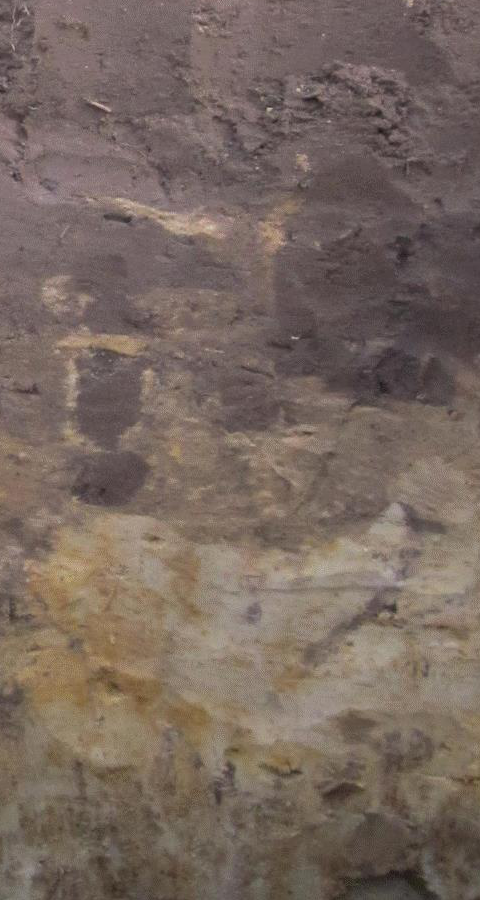

In [2]:
# Lade das Bild
image = Image.open(os.path.join(path_pictures,df['file'][600]))

x_len = 240
y_len = 450

# Definiere den Bereich, der ausgeschnitten werden soll (left, upper, right, lower)
# Beispiel: Ein Ausschnitt von (50, 50) bis (200, 200)
# left = 50
# upper = 50
# right = 200
# lower = 200
# crop_area = (left, upper, right, lower)

center_x, center_y = int(image.size[0] / 2), int(image.size[1] / 2)

left = center_x - x_len
right = center_x + x_len
upper = center_y - y_len
lower = center_y + y_len
crop_area = (left, upper, right, lower)

# Schneide den Bereich aus
cropped_image = image.crop(crop_area)

# Zeige den ausgeschnittenen Bereich
cropped_image

In [3]:
# Definiere die Größe des rechteckigen Ausschnitts
crop_width = 240
crop_height = 440

min_labels = 10
label = 'Bodenart'
feature_columns = ['xcoord','ycoord']

vision_backbone = 'WinKawaks/vit-small-patch16-224' 


counts = df[label].value_counts()
counts[counts<min_labels] = np.nan
df[label] = df[label].replace(counts.index, range(len(counts)))
df = df.dropna(subset= feature_columns + [label])
df[label] = df[label].astype(int)

# Definiere die Custom-Transformation für das Zuschneiden des Bildes
class CenterCropTransform:
    def __init__(self, crop_width=crop_width, crop_height=crop_height):
        self.crop_width = crop_width
        self.crop_height = crop_height

    def __call__(self, img):
        # Bildgröße ermitteln
        width, height = img.size
        
        # Berechne die Koordinaten für den zentrierten Ausschnitt
        left = (width - self.crop_width) // 2
        upper = (height - self.crop_height) // 2
        right = left + self.crop_width
        lower = upper + self.crop_height
        
        # Zuschnitt des Bildes
        return img.crop((left, upper, right, lower))

# Define the image transforms (resize, normalize, etc.)
transform = transforms.Compose([
    CenterCropTransform(crop_width, crop_height),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet statistics
])


# Custom Dataset class für Bilder, tabellarische Daten und Labels
class ImageTabularDataset(Dataset):
    def __init__(self, 
                 dataframe, 
                 transform=None, 
                 image_path=None, 
                 label=None,
                 feature_columns=None
                ):
        """
        dataframe: Pandas DataFrame mit Bildpfaden, tabellarischen Daten und Labels
        transform: Bildtransformationen
        """
        self.dataframe = dataframe
        self.transform = transform
        self.image_path = image_path
        self.label = label
        self.feature_columns = feature_columns

    def __len__(self):
        # Länge des Datasets (Anzahl der Zeilen im DataFrame)
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Extrahiere den Bildpfad aus dem DataFrame
        image_path = self.dataframe.iloc[idx][self.image_path]
        
        # Lade das Bild
        image = Image.open(image_path)
        
        # Wende Bildtransformationen an, falls vorhanden
        if self.transform:
            image = self.transform(image)
        
        # Extrahiere die tabellarischen Daten (numerische Features) aus dem DataFrame
        tabular_features_array = self.dataframe.iloc[idx][self.feature_columns].astype(float).values
        tabular_features = torch.tensor(tabular_features_array, dtype=torch.float32)
        
        # Extrahiere das Label
        label = torch.tensor(self.dataframe.iloc[idx][self.label], dtype=torch.long)  # Für Klassifikation (long)
        
        return image, tabular_features, label


/var/folders/fb/nnrbj09j32jdr_jvd_fnmyn00000gn/T/ipykernel_73919/3711871240.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[label] = df[label].replace(counts.index, range(len(counts)))


In [14]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoFeatureExtractor

# Definiere das Modell mit DINOv2 Backbone von Hugging Face
class ImageTabularModel(nn.Module):
    def __init__(self, vision_backbone, num_tabular_features, num_classes):
        super(ImageTabularModel, self).__init__()
        
        # Lade das vortrainierte DINOv2-Modell von Hugging Face
        self.vision_backbone = AutoModel.from_pretrained(vision_backbone)
        self.feature_extractor = AutoFeatureExtractor.from_pretrained(vision_backbone)
        
        # Definiere ein MLP für die tabellarischen Daten
        self.fc_tabular = nn.Sequential(
            nn.Linear(num_tabular_features, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        
        # Kombinierte Fully Connected Layers
        self.fc_combined = nn.Sequential(
            # nn.Linear(768 + 16, 64),  # 768 ist die Ausgabegröße von DINOv2, 16 ist die Größe des MLP
            nn.Linear(384 + 16, 64),  # 768 ist die Ausgabegröße von DINOv2, 16 ist die Größe des MLP
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, image, tabular_features):
        # Extrahiere die Bildfeatures
        image_features = self.vision_backbone(pixel_values=image).last_hidden_state[:, 0, :]
        # import pdb;pdb.set_trace()
        
        # Verarbeite die tabellarischen Daten mit dem MLP
        tabular_features_processed = self.fc_tabular(tabular_features)
        
        # Kombiniere Bild- und Tabellarische Features
        combined_features = torch.cat((image_features, tabular_features_processed), dim=1)
        
        # Endgültige Vorhersage
        output = self.fc_combined(combined_features)
        return output

model = ImageTabularModel(vision_backbone=vision_backbone, 
                                    num_tabular_features=len(feature_columns), 
                                    num_classes=len(df[label].unique()))


Some weights of ViTModel were not initialized from the model checkpoint at WinKawaks/vit-small-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/felix/opt/anaconda3/envs/proto/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [16]:
from sklearn.model_selection import train_test_split
import torch.optim as optim

train_df, test_df = train_test_split(df)


# Erstelle das Dataset mit DataFrame, Bildern und tabellarischen Daten
dataset = ImageTabularDataset(dataframe=train_df[:100], 
                              transform=transform,
                              image_path='file',
                              label=label,
                              feature_columns=feature_columns
                             )

# Erstelle den DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Beispiel: Definiere einen Optimizer und eine Loss-Funktion
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

model.train()
for epoch in range(10):
    optimizer.zero_grad()
    # Schleife durch den DataLoader (Training oder Evaluierung)
    for batch in dataloader:
        images, tabular_features, labels = batch
        outputs = model(image=images, tabular_features=tabular_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 3019.8037109375
Epoch 1, Loss: 3469.342041015625
Epoch 2, Loss: 3508.099609375
Epoch 3, Loss: 1023.06494140625
Epoch 4, Loss: 90.26815795898438
Epoch 5, Loss: 723.0885620117188
Epoch 6, Loss: 1237.665283203125
Epoch 7, Loss: 1174.47216796875
Epoch 8, Loss: 653.60400390625
Epoch 9, Loss: 469.83660888671875


In [ ]:
test_dataset = ImageTabularDataset(dataframe=test_df, 
                              transform=transform,
                              image_path='file',
                              label=label,
                              feature_columns=feature_columns
                             )

# Erstelle den DataLoader
dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
model.eval()  # Setze das Modell in den Evaluierungsmodus
with torch.no_grad():
    outputs = []
    for batch in dataloader:
        images, tabular_features, labels = batch
        outputs.append(model(image=images, tabular_features=tabular_features))
        

In [ ]:
from transformers import TrainingArguments, Trainer

# Define training arguments
training_args = TrainingArguments(
    output_dir="./testtest",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    num_train_epochs=53,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=1000,
    learning_rate=5e-5,
    weight_decay=0.01,
    report_to="none",  # Set to "wandb" or other service if tracking experiments
)

# Initialize the Trainer with the model, data, and training arguments
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=collate_fn,
)

# Train the model
trainer.train()

In [ ]:
# Evaluate the model on the test dataset
eval_results = trainer.evaluate()
print(f"Test Accuracy: {eval_results['eval_accuracy']}")